In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from pathlib import Path
# Estadisticas de los que estuvieron hoy en la tarde en break y los que estuvieron de break ayer en la tarde
ruta="C:/Users/BOSS/Documents/Estadisticas/Acumuladores de Agentes (2).csv"
df=pd.read_csv(ruta,sep=';')

df['Intervalo']=pd.to_datetime(df['Intervalo'])

turno_mañana=df[(df['Intervalo'].dt.time >= pd.to_datetime('09:30:00').time()) &
                 (df['Intervalo'].dt.time <= pd.to_datetime('14:30:00').time())]

turno_tarde=df[(df['Intervalo'].dt.time >= pd.to_datetime('15:00:00').time()) &
                 (df['Intervalo'].dt.time <= pd.to_datetime('20:00:00').time())]
print(f'Turno mañana: {turno_mañana.head()}')
print(f'Turno tarde: {turno_tarde.head()}')


Turno mañana:             Intervalo  Cantidad Agentes Únicos  Cantidad Agentes Simultáneos  \
0 2025-02-19 09:30:00                      NaN                           NaN   
1 2025-02-19 09:30:00                      NaN                           NaN   
2 2025-02-19 09:30:00                      NaN                           NaN   
3 2025-02-19 09:30:00                      NaN                           NaN   
4 2025-02-19 10:00:00                      NaN                           NaN   

      Grupo Login Id  Agente  LogIn  Internas Entrantes No Atendidas  \
0  Mendoza1     mza3   MZA 3   1737                                0   
1  Mendoza1    mza32  MZA 32   1110                                0   
2  Mendoza1    mza40  MZA 40    617                                0   
3  Mendoza1     mza8   MZA 8   1464                                0   
4  Mendoza1     mza1   MZA 1   1363                                0   

   Internas Entrantes Atendidas  Internas Salientes No Atendidas  ...  \

C:\Users\BOSS\AppData\Local\Temp\ipykernel_6860\408197737.py:9: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Intervalo']=pd.to_datetime(df['Intervalo'])


In [14]:
turno_mañana
turno_tarde

df['promedio_mañana']=turno_mañana.groupby('Agente')['Break'].mean()


In [15]:
df['promedio_tarde']=turno_tarde.groupby('Agente')['Break'].mean()

In [16]:
df

,Intervalo,Cantidad Agentes Únicos,Cantidad Agentes Simultáneos,Grupo,Login Id,Agente,LogIn,Internas Entrantes No Atendidas,Internas Entrantes Atendidas,Internas Salientes No Atendidas,...,Tipificación Neutro,FechaRango,CE,%CE,Exitos / CE,Exitos por Hora Real,idAgente,idGrupo,promedio_mañana,promedio_tarde
0,2025-02-19 09:30:00,NaN,NaN,Mendoza1,mza3,MZA 3,1737,0,0,0,...,0,NaN,0,0,0,0,2214,NaN,NaN,NaN
1,2025-02-19 09:30:00,NaN,NaN,Mendoza1,mza32,MZA 32,1110,0,0,0,...,0,NaN,3,1,"0,666666666666667","11,3924050632911",2580,NaN,NaN,NaN
2,2025-02-19 09:30:00,NaN,NaN,Mendoza1,mza40,MZA 40,617,0,0,0,...,0,NaN,0,0,0,0,2833,NaN,NaN,NaN
3,2025-02-19 09:30:00,NaN,NaN,Mendoza1,mza8,MZA 8,1464,0,0,0,...,0,NaN,3,1,0,0,2219,NaN,NaN,NaN
4,2025-02-19 10:00:00,NaN,NaN,Mendoza1,mza1,MZA 1,1363,0,0,0,...,0,NaN,7,1,"0,428571428571429","10,1503759398496",2212,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,2025-02-20 16:30:00,NaN,NaN,Mendoza1,mza47,MZA 47,697,0,0,0,...,0,NaN,3,1,0,0,2996,NaN,NaN,NaN
894,2025-02-20 16:30:00,NaN,NaN,Mendoza1,mza49,MZA 49,1800,0,0,0,...,0,NaN,7,1,0,0,3209,NaN,NaN,NaN
895,2025-02-20 16:30:00,NaN,NaN,Mendoza1,mza5,MZA 5,1800,0,0,0,...,0,NaN,16,1,"0,3125","15,7618213660245",2216,NaN,NaN,NaN
896,2025-02-20 16:30:00,NaN,NaN,Mendoza1,mza7,MZA 7,1614,0,0,0,...,0,NaN,8,1,"0,375","7,37201365187713",2218,NaN,NaN,NaN


In [17]:
import pandas as pd
import matplotlib.pyplot as plt 

# Suponiendo que 'df' es tu DataFrame original y contiene la columna 'Intervalo' como datetime y 'Break'

# Primero, convertir la columna 'Intervalo' a datetime si no lo está
df['Intervalo'] = pd.to_datetime(df['Intervalo'])

# Crear una columna de fecha sin la hora
df['Fecha'] = df['Intervalo'].dt.date

# Clasificar los intervalos de tiempo en mañana o tarde
df['Turno'] = df['Intervalo'].apply(lambda x: 'Mañana' if x.hour >= 9 and x.hour < 14 else 'Tarde')

# Ahora, calculamos el promedio de 'Break' para cada turno por agente y fecha
promedio_turno = df.groupby(['Agente', 'Fecha', 'Turno'])['Break'].sum().reset_index()

# Dividir la suma de Break entre 60 para obtener el promedio por minuto
promedio_turno['Promedio por Break (min)'] =( promedio_turno['Break'] / 60).astype(int)
promedio_turno['Promedio por Break (min)'].astype(int)  
# Para agregar el rango de tiempo en la columna de resumen
def rango_hora(turno):
    if turno == 'Mañana':
        return '09:30:00 hasta 14:30:00'
    elif turno == 'Tarde':
        return '15:00:00 hasta 20:00:00'
    return ''

# Aplicar la función para obtener el rango de tiempo
promedio_turno['Rango de hora'] = promedio_turno['Turno'].apply(rango_hora)

# Ahora, podemos reformatear el DataFrame para que tenga el formato que deseas
df_final = promedio_turno.pivot_table(index=['Agente', 'Fecha'], columns='Rango de hora', values='Promedio por Break (min)', aggfunc='sum')

# Renombrar las columnas para agregar el prefijo 'Promedio por Break:'
df_final.columns = [f'Promedio por Break: {col}' for col in df_final.columns]

# Rellenar los valores nulos si es necesario
df_final.fillna('Sin datos', inplace=True)

# Guardar el DataFrame final en un archivo CSV
df_final.to_csv('Estadisticas.csv', index=True, sep=';', encoding='utf8')

# Mostrar el resultado final
print(df_final)



                  Promedio por Break: 09:30:00 hasta 14:30:00  \
Agente Fecha                                                    
MZA 1  2025-02-19                                        28.0   
       2025-02-20                                        43.0   
MZA 10 2025-02-20                                        44.0   
MZA 12 2025-02-19                                         0.0   
       2025-02-20                                         0.0   
...                                                       ...   
MZA 8  2025-02-20                                        55.0   
MZA 9  2025-02-19                                        60.0   
       2025-02-20                                        63.0   
Mza 51 2025-02-19                                         0.0   
       2025-02-20                                         0.0   

                   Promedio por Break: 15:00:00 hasta 20:00:00  
Agente Fecha                                                    
MZA 1  2025-02-19       

C:\Users\BOSS\AppData\Local\Temp\ipykernel_6860\2276806611.py:39: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Sin datos' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_final.fillna('Sin datos', inplace=True)


In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
promedio_turno
df_final


Promedio por Break: 09:30:00 hasta 14:30:00  \
Agente Fecha                                                    
MZA 1  2025-02-19                                        28.0   
       2025-02-20                                        43.0   
MZA 10 2025-02-20                                        44.0   
MZA 12 2025-02-19                                         0.0   
       2025-02-20                                         0.0   
...                                                       ...   
MZA 8  2025-02-20                                        55.0   
MZA 9  2025-02-19                                        60.0   
       2025-02-20                                        63.0   
Mza 51 2025-02-19                                         0.0   
       2025-02-20                                         0.0   

                   Promedio por Break: 15:00:00 hasta 20:00:00  
Agente Fecha                                                    
MZA 1  2025-02-19                                          3.0  
       2025-02-20                                          6.0  
MZA 10 2025-02-20                                          6.0  
MZA 12 2025-02-19                                          0.0  
       2025-02-20                                          0.0  
...                                                        ...  
MZA 8  2025-02-20                                          3.0  
MZA 9  2025-02-19                                         49.0  
       2025-02-20                                          5.0  
Mza 51 2025-02-19                                          0.0  
       2025-02-20                                          0.0  

[82 rows x 2 columns]

In [19]:
promedio_turno

,Agente,Fecha,Turno,Break,Promedio por Break (min),Rango de hora
0,MZA 1,2025-02-19,Mañana,1726,28,09:30:00 hasta 14:30:00
1,MZA 1,2025-02-19,Tarde,239,3,15:00:00 hasta 20:00:00
2,MZA 1,2025-02-20,Mañana,2601,43,09:30:00 hasta 14:30:00
3,MZA 1,2025-02-20,Tarde,405,6,15:00:00 hasta 20:00:00
4,MZA 10,2025-02-20,Mañana,2641,44,09:30:00 hasta 14:30:00
...,...,...,...,...,...,...
138,MZA 9,2025-02-20,Tarde,311,5,15:00:00 hasta 20:00:00
139,Mza 51,2025-02-19,Mañana,0,0,09:30:00 hasta 14:30:00
140,Mza 51,2025-02-19,Tarde,0,0,15:00:00 hasta 20:00:00
141,Mza 51,2025-02-20,Mañana,0,0,09:30:00 hasta 14:30:00


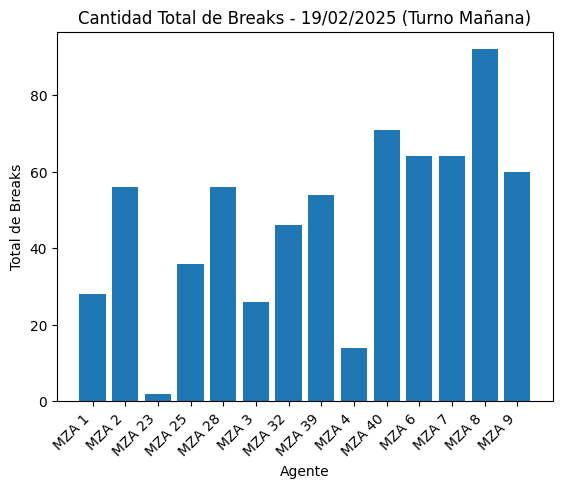

,Agente,Fecha,Turno,Break,Promedio por Break (min),Rango de hora
0,MZA 1,2025-02-19,Mañana,1726,28,09:30:00 hasta 14:30:00
31,MZA 2,2025-02-19,Mañana,3399,56,09:30:00 hasta 14:30:00
45,MZA 23,2025-02-19,Mañana,156,2,09:30:00 hasta 14:30:00
49,MZA 25,2025-02-19,Mañana,2217,36,09:30:00 hasta 14:30:00
55,MZA 28,2025-02-19,Mañana,3399,56,09:30:00 hasta 14:30:00
59,MZA 3,2025-02-19,Mañana,1603,26,09:30:00 hasta 14:30:00
65,MZA 32,2025-02-19,Mañana,2810,46,09:30:00 hasta 14:30:00
77,MZA 39,2025-02-19,Mañana,3262,54,09:30:00 hasta 14:30:00
81,MZA 4,2025-02-19,Mañana,896,14,09:30:00 hasta 14:30:00
85,MZA 40,2025-02-19,Mañana,4303,71,09:30:00 hasta 14:30:00


<Figure size 640x480 with 0 Axes>

In [20]:
import pandas as pd

promedio_turno['Fecha']=pd.to_datetime(promedio_turno['Fecha'])
promedio_turno
# Filtrar por Turno "Mañana" y Fecha "2025-02-19"
df_filtrado = promedio_turno[
    (promedio_turno['Turno'] == 'Mañana') & 
    (promedio_turno['Fecha'] == '2025-02-19') & 
    (promedio_turno['Promedio por Break (min)'] != 0)
]

# Crear el gráfico
plt.bar(df_filtrado['Agente'], df_filtrado['Promedio por Break (min)'])
plt.title('Cantidad Total de Breaks - 19/02/2025 (Turno Mañana)')
plt.xlabel('Agente')
plt.ylabel('Total de Breaks')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.savefig('TM_19_02_2025.png')
df_filtrado

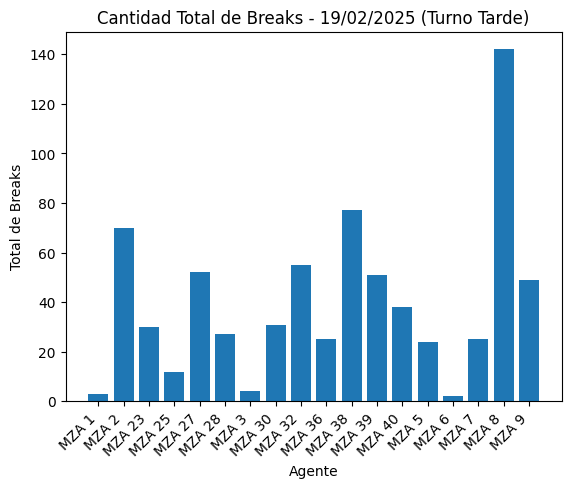

,Agente,Fecha,Turno,Break,Promedio por Break (min),Rango de hora
1,MZA 1,2025-02-19,Tarde,239,3,15:00:00 hasta 20:00:00
32,MZA 2,2025-02-19,Tarde,4227,70,15:00:00 hasta 20:00:00
46,MZA 23,2025-02-19,Tarde,1858,30,15:00:00 hasta 20:00:00
50,MZA 25,2025-02-19,Tarde,774,12,15:00:00 hasta 20:00:00
53,MZA 27,2025-02-19,Tarde,3141,52,15:00:00 hasta 20:00:00
56,MZA 28,2025-02-19,Tarde,1643,27,15:00:00 hasta 20:00:00
60,MZA 3,2025-02-19,Tarde,297,4,15:00:00 hasta 20:00:00
63,MZA 30,2025-02-19,Tarde,1870,31,15:00:00 hasta 20:00:00
66,MZA 32,2025-02-19,Tarde,3318,55,15:00:00 hasta 20:00:00
73,MZA 36,2025-02-19,Tarde,1532,25,15:00:00 hasta 20:00:00


In [21]:

# Filtrar por Turno "Mañana" y Fecha "2025-02-19"
df_filtrado = promedio_turno[
    (promedio_turno['Turno'] == 'Tarde') & 
    (promedio_turno['Fecha'] == '2025-02-19') & 
    (promedio_turno['Promedio por Break (min)'] != 0)
]

# Crear el gráfico
plt.bar(df_filtrado['Agente'], df_filtrado['Promedio por Break (min)'])
plt.title('Cantidad Total de Breaks - 19/02/2025 (Turno Tarde)')
plt.xlabel('Agente')
plt.ylabel('Total de Breaks')
plt.xticks(rotation=45, ha='right')
plt.savefig('')
plt.show()
df_filtrado

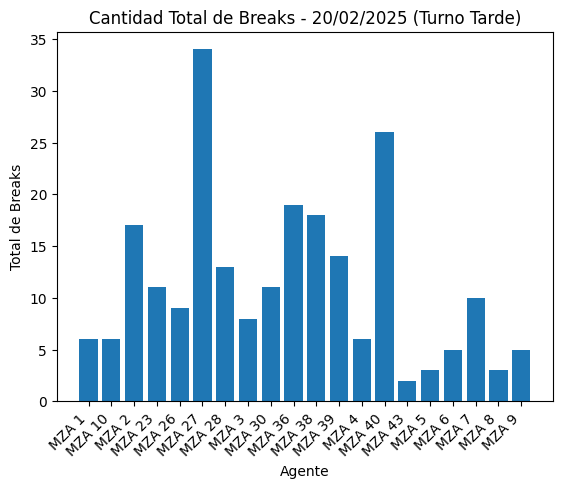

,Agente,Fecha,Turno,Break,Promedio por Break (min),Rango de hora
3,MZA 1,2025-02-20,Tarde,405,6,15:00:00 hasta 20:00:00
5,MZA 10,2025-02-20,Tarde,367,6,15:00:00 hasta 20:00:00
34,MZA 2,2025-02-20,Tarde,1040,17,15:00:00 hasta 20:00:00
48,MZA 23,2025-02-20,Tarde,673,11,15:00:00 hasta 20:00:00
52,MZA 26,2025-02-20,Tarde,559,9,15:00:00 hasta 20:00:00
54,MZA 27,2025-02-20,Tarde,2061,34,15:00:00 hasta 20:00:00
58,MZA 28,2025-02-20,Tarde,795,13,15:00:00 hasta 20:00:00
62,MZA 3,2025-02-20,Tarde,486,8,15:00:00 hasta 20:00:00
64,MZA 30,2025-02-20,Tarde,680,11,15:00:00 hasta 20:00:00
74,MZA 36,2025-02-20,Tarde,1155,19,15:00:00 hasta 20:00:00


In [22]:

# Filtrar por Turno "Mañana" y Fecha "2025-02-19"
df_filtrado = promedio_turno[
    (promedio_turno['Turno'] == 'Tarde') & 
    (promedio_turno['Fecha'] == '2025-02-20') & 
    (promedio_turno['Promedio por Break (min)'] != 0)
]

# Crear el gráfico
plt.bar(df_filtrado['Agente'], df_filtrado['Promedio por Break (min)'])
plt.title('Cantidad Total de Breaks - 20/02/2025 (Turno Tarde)')
plt.xlabel('Agente')
plt.ylabel('Total de Breaks')
plt.xticks(rotation=45, ha='right')
plt.savefig('')
plt.show()
df_filtrado

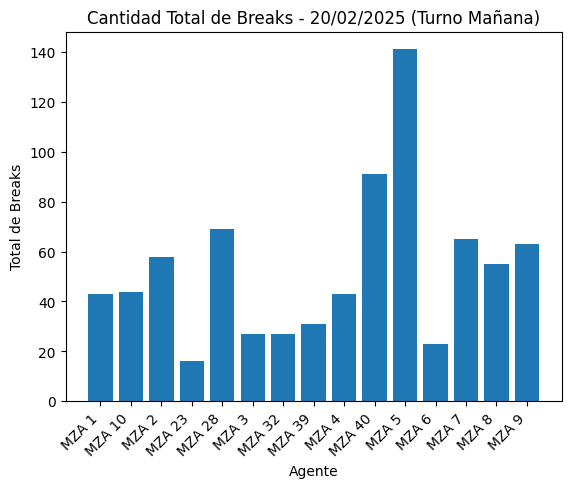

,Agente,Fecha,Turno,Break,Promedio por Break (min),Rango de hora
2,MZA 1,2025-02-20,Mañana,2601,43,09:30:00 hasta 14:30:00
4,MZA 10,2025-02-20,Mañana,2641,44,09:30:00 hasta 14:30:00
33,MZA 2,2025-02-20,Mañana,3480,58,09:30:00 hasta 14:30:00
47,MZA 23,2025-02-20,Mañana,979,16,09:30:00 hasta 14:30:00
57,MZA 28,2025-02-20,Mañana,4154,69,09:30:00 hasta 14:30:00
61,MZA 3,2025-02-20,Mañana,1629,27,09:30:00 hasta 14:30:00
67,MZA 32,2025-02-20,Mañana,1625,27,09:30:00 hasta 14:30:00
79,MZA 39,2025-02-20,Mañana,1876,31,09:30:00 hasta 14:30:00
83,MZA 4,2025-02-20,Mañana,2622,43,09:30:00 hasta 14:30:00
87,MZA 40,2025-02-20,Mañana,5482,91,09:30:00 hasta 14:30:00


<Figure size 640x480 with 0 Axes>

In [23]:
import pandas as pd

promedio_turno['Fecha']=pd.to_datetime(promedio_turno['Fecha'])
promedio_turno
# Filtrar por Turno "Mañana" y Fecha "2025-02-19"
df_filtrado = promedio_turno[
    (promedio_turno['Turno'] == 'Mañana') & 
    (promedio_turno['Fecha'] == '2025-02-20') & 
    (promedio_turno['Promedio por Break (min)'] != 0)
]

# Crear el gráfico
plt.bar(df_filtrado['Agente'], df_filtrado['Promedio por Break (min)'])
plt.title('Cantidad Total de Breaks - 20/02/2025 (Turno Mañana)')
plt.xlabel('Agente')
plt.ylabel('Total de Breaks')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.savefig('TM_19_02_2025.png')
df_filtrado


In [24]:
import pandas as pd

# Leer el CSV
df = pd.read_csv("Detalle Interacciones (Campaña - Lote).csv", sep=';')

# Filtrar las filas donde TalkingTime sea mayor a 90
df_filtrado = df[df['TalkingTime'] > 90]

# Agrupar por 'Cliente' y 'Nombre Agente' y contar cuántas veces ocurre cada combinación
df_grouped = df_filtrado.groupby(['Cliente', 'Nombre Agente']).size().reset_index(name='Cantidad Interacciones')

# Mostrar los primeros registros para verificar
df_new=pd.DataFrame(df_grouped)


# buscar numero de cliente donde el talkitime sea mayor al 1min y medio y guarde tambien que agente lo hizo

df_new.to_csv('NúmeroDeCLiente.csv',sep=';')


FileNotFoundError: [Errno 2] No such file or directory: 'Detalle Interacciones (Campaña - Lote).csv'